# 01 | EDA & Feature Engineering
Credit Card Fraud Detection

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Load engineered dataset
df = pd.read_parquet("data/engineered_transactions.parquet", engine='fastparquet')
print(df.columns)
print(f"Loaded dataset with {df.shape[0]} rows and {df.shape[1]} columns")

Index(['transaction_id', 'customer_id', 'amount', 'transaction_time',
       'time_since_last_txn', 'is_fraud', 'amount_norm',
       'merchant_category_electronics', 'merchant_category_grocery',
       'merchant_category_restaurants', 'merchant_category_travel',
       'device_mobile', 'device_tablet', 'location_FL', 'location_IL',
       'location_NY', 'location_TX'],
      dtype='object')


## Feature Engineering Plan

1. Transaction-Level Features
2. Customer-Level Features
3. Location & Velocity Features
4. Historical & Behavioral Features
5. Derived / Engineered Features

Each feature will have:
- Source column(s)
- Transformation / aggregation
- Handling missing values
- Feature type (numeric, categorical)

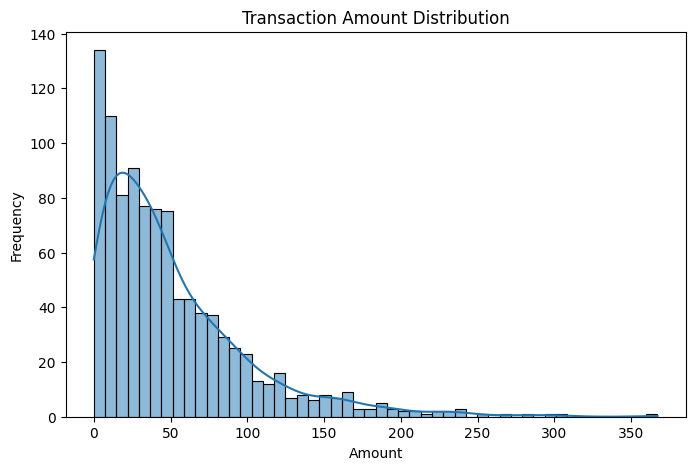

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(df['amount'], bins=50, kde=True)
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

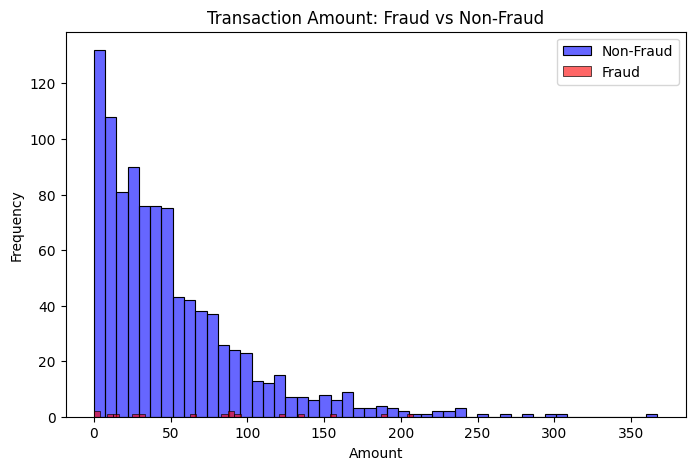

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(df[df['is_fraud']==0]['amount'], color='blue', label='Non-Fraud', bins=50, alpha=0.6)
sns.histplot(df[df['is_fraud']==1]['amount'], color='red', label='Fraud', bins=50, alpha=0.6)
plt.title("Transaction Amount: Fraud vs Non-Fraud")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [10]:
plt.figure(figsize=(10,5))
sns.histplot(df['cust_txn_count'], bins=30)
plt.title("Number of Transactions per Customer")
plt.xlabel("Transactions")
plt.ylabel("Count")
plt.show()

KeyError: 'cust_txn_count'

<Figure size 1000x500 with 0 Axes>

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['time_since_last_txn'], bins=50)
plt.title("Time Since Last Transaction (minutes)")
plt.xlabel("Minutes")
plt.ylabel("Frequency")
plt.show()

In [ ]:
import os
os.makedirs("data", exist_ok=True)

# Save the engineered dataset
df.to_csv("data/engineered_transactions.csv", index=False)
print("Engineered dataset saved to data/engineered_transactions.csv")

## Next Steps

- Split dataset into train/test sets
- Train baseline ML model (e.g., XGBoost or Logistic Regression)
- Evaluate using cost-sensitive metrics (fraud costs)
- Use SHAP for feature importance / explainability
- Wrap into FastAPI inference API for real-time scoring